## Model Strategies

For the problem at hand, the most appropriate strategy was to fit a number of classification models to classify observations into vaccinated or un-vaccinated.

The following models were fit, tested, and tuned to produce the most accurate model possible based on F-1 score: neural network model, logistic regression, SVM, gradient boosting classifier, Gaussian Naive Bayes, KNN, Random Forest, and a boosted classifier.

## Loading Packages

In [41]:
#Standard data analytical libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import os, warnings, time, dmba
import scikitplot as skplt 

#Data Mining Book Libraries
from dmba import liftChart, gainsChart,regressionSummary, classificationSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection, adjusted_r2_score, AIC_score, BIC_score
from os.path import exists
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc, roc_auc_score, plot_confusion_matrix,confusion_matrix,r2_score
#Classification 
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression,  LinearRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# ROC-AUC Curves
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

import imblearn
from imblearn.over_sampling import SMOTE

# Used to save keystrokes when wanting to print something. Now we can just use
# p("Hello") instead of print("Hello")
p = print
# import csv
# import re

# Change this value if you are not using o_desktop
computer = 'o_desktop'
#computer = 'other'
if (computer == 'o_desktop'):
    os.environ['NUMEXPR_MAX_THREADS'] = '24'
else:
    # default is 4 or 8
    os.environ['NUMEXPR_MAX_THREADS'] = '8'

# For future use:
# import threading
# import multiprocessing

## Loading Data

In [2]:
# Setting directories and loading training set and training labels
repo_directory = r'C:/ADS_599_Final/'
data_folder_directory = r'C:/ADS_599_Final/Data_Folder/'
df_features_file = 'C:/ADS_599_Final/Data_Folder/training_set_features.csv'
df_labels_file = 'C:/ADS_599_Final/Data_Folder/training_set_labels.csv'
df = pd.read_csv(df_features_file)
df_labels = pd.read_csv(df_labels_file)

# Combining training data with training labels for modeling
df = df.join(df_labels.set_index('respondent_id'), on='respondent_id')

df.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


## Handling Null Values

In [3]:
# Renaming df
df_train = df

# Categories
df_train['h1n1_concern'] = df_train['h1n1_concern'].fillna(-1)
df_train['h1n1_knowledge'] = df_train['h1n1_knowledge'].fillna(-1)
df_train['behavioral_antiviral_meds'] = df_train['behavioral_antiviral_meds'].fillna(-1)
df_train['behavioral_avoidance'] = df_train['behavioral_avoidance'].fillna(-1)
df_train['behavioral_face_mask'] = df_train['behavioral_face_mask'].fillna(-1)
df_train['behavioral_large_gatherings'] = df_train['behavioral_large_gatherings'].fillna(-1)
df_train['behavioral_outside_home'] = df_train['behavioral_outside_home'].fillna(-1)
df_train['behavioral_wash_hands'] = df_train['behavioral_wash_hands'].fillna(-1)          
df_train['behavioral_touch_face'] = df_train['behavioral_touch_face'].fillna(-1)
df_train['doctor_recc_h1n1'] = df_train['doctor_recc_h1n1'].fillna(-1)
df_train['doctor_recc_seasonal'] = df_train['doctor_recc_seasonal'].fillna(-1)
df_train['chronic_med_condition'] = df_train['chronic_med_condition'].fillna(-1)
df_train['child_under_6_months'] = df_train['child_under_6_months'].fillna(-1)
df_train['health_worker'] = df_train['health_worker'].fillna(-1)
df_train['health_insurance'] = df_train['health_insurance'].fillna(-1)
df_train['opinion_h1n1_vacc_effective'] = df_train['opinion_h1n1_vacc_effective'].fillna(-1)
df_train['opinion_h1n1_sick_from_vacc'] = df_train['opinion_h1n1_sick_from_vacc'].fillna(-1)
df_train['opinion_h1n1_risk'] = df_train['opinion_h1n1_risk'].fillna(-1)
df_train['opinion_seas_vacc_effective'] = df_train['opinion_seas_vacc_effective'].fillna(-1)
df_train['opinion_seas_risk'] = df_train['opinion_seas_risk'].fillna(-1)
df_train['opinion_seas_sick_from_vacc'] = df_train['opinion_seas_sick_from_vacc'].fillna(-1)
df_train['household_adults'] = df_train['household_adults'].fillna(-1)
df_train['household_children'] = df_train['household_children'].fillna(-1)

# Numbers
df_train['age_group'] = df_train['age_group'].fillna("no_response")
df_train['education'] = df_train['education'].fillna("no_response")
df_train['race'] = df_train['race'].fillna("no_response")
df_train['income_poverty'] = df_train['income_poverty'].fillna("no_response")
df_train['marital_status'] = df_train['marital_status'].fillna("no_response")
df_train['rent_or_own'] = df_train['rent_or_own'].fillna("no_response")
df_train['employment_status'] = df_train['employment_status'].fillna("no_response")
df_train['employment_occupation'] = df_train['employment_occupation'].fillna("no_response")
df_train['employment_industry'] = df_train['employment_industry'].fillna("no_response")

In [4]:
# Label encoding
df_train_label = df_train
    # Encode labels the below is equivalent to df_train['hhs_geo_region']= label_encoder.fit_transform(df_train['hhs_geo_region'])
df_train_label["hhs_geo_region"] = df_train["hhs_geo_region"].astype('category')
df_train_label["hhs_geo_region"] = df_train["hhs_geo_region"].cat.codes
df_train_label["census_msa"] = df_train["census_msa"].astype('category')
df_train_label["census_msa"] = df_train["census_msa"].cat.codes
df_train_label["employment_industry"] = df_train["employment_industry"].astype('category')
df_train_label["employment_industry"] = df_train["employment_industry"].cat.codes
df_train_label["employment_occupation"] = df_train["employment_occupation"].astype('category')
df_train_label["employment_occupation"] = df_train["employment_occupation"].cat.codes
df_train_label["employment_status"] = df_train["employment_status"].astype('category')
df_train_label["employment_status"] = df_train["employment_status"].cat.codes
df_train_label["rent_or_own"] = df_train["rent_or_own"].astype('category')
df_train_label["rent_or_own"] = df_train["rent_or_own"].cat.codes
df_train_label["marital_status"] = df_train["marital_status"].astype('category')
df_train_label["marital_status"] = df_train["marital_status"].cat.codes
df_train_label["income_poverty"] = df_train["income_poverty"].astype('category')
df_train_label["income_poverty"] = df_train["income_poverty"].cat.codes
df_train_label["race"] = df_train["race"].astype('category')
df_train_label["race"] = df_train["race"].cat.codes
df_train_label["education"] = df_train["education"].astype('category')
df_train_label["education"] = df_train["education"].cat.codes
df_train_label["age_group"] = df_train["age_group"].astype('category')
df_train_label["age_group"] = df_train["age_group"].cat.codes
df_train_label["sex"] = df_train["sex"].astype('category')
df_train_label["sex"] = df_train["sex"].cat.codes

p("After encoding the null counts per column are: ")
p(df_train.isnull().sum())

After encoding the null counts per column are: 
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                 

In [5]:
# Handling nulls three ways

handling_nulls = "median" # options "median" "iterative" "dropall"
if handling_nulls == "iterative":
    #Need to add back the NaN for the imputations.
    df_train.replace(-1, np.nan) 
    df_train.replace("no_response", np.nan) 
    
    # SMOTE Sampling
    temp_columns = df_train.columns
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(df_train)
    df_train = pd.DataFrame(data=imp.transform(df_train))
    df_train.columns = temp_columns
    df_train
elif handling_nulls == "median":
    df_train_median = df_train
    #Need to add back the NaN for the imputations.
    df_train_median.replace(-1, np.nan) 
    df_train_median.replace("no_response", np.nan) 
    df_train_median.fillna(df_train.median())
elif handling_nulls == "dropall":
    df_train_drop = df_train
    #Need to add back the NaN for the imputations.
    df_train_drop.replace(-1, np.nan) 
    df_train_drop.replace("no_response", np.nan) 
    # See how it is if we drop the NaNs
    df_train_drop = df_train.dropna(inplace=False) #This should be replace with imputation.

In [6]:
handling_nulls = "dropall"
if handling_nulls == "iterative":
    #Need to add back the NaN for the imputations.
    df_train.replace(-1, np.nan) 
    df_train.replace("no_response", np.nan) 
    
    # SMOTE Sampling
    temp_columns = df_train.columns
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(df_train)
    df_train = pd.DataFrame(data=imp.transform(df_train))
    df_train.columns = temp_columns
    df_train
elif handling_nulls == "median":
    df_train_median = df_train
    #Need to add back the NaN for the imputations.
    df_train_median.replace(-1, np.nan) 
    df_train_median.replace("no_response", np.nan) 
    df_train_median.fillna(df_train.median())
elif handling_nulls == "dropall":
    df_train_drop = df_train
    #Need to add back the NaN for the imputations.
    df_train_drop.replace(-1, np.nan) 
    df_train_drop.replace("no_response", np.nan) 
    # See how it is if we drop the NaNs
    df_train_drop = df_train.dropna(inplace=False) #This should be replace with imputation.
p("There should be no nulls now: ")
p(df_train_drop.isnull().sum())

There should be no nulls now: 
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_s

In [7]:
# Respondent_id are all unique so its irrelevant now that we merged.
df_train = df_train.drop(columns=['respondent_id'], inplace=False)
df_train_label = df_train_label.drop(columns=['respondent_id'], inplace=False)
df_train_median = df_train_median.drop(columns=['respondent_id'], inplace=False)
df_train_drop = df_train_drop.drop(columns=['respondent_id'], inplace=False)

## Class Balancing

In [8]:
oversample = SMOTE()

# Separating the features and targets
# Original Data
X_h1n1 = df_train.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
X_seasonal = X_h1n1
y_h1n1 = df_train['h1n1_vaccine']
y_seasonal = df_train['seasonal_vaccine']
X_h1n1, y_h1n1 = oversample.fit_resample(X_h1n1, y_h1n1)
X_seasonal, y_seasonal = oversample.fit_resample(X_seasonal, y_seasonal)

# Encoded Data
X_label_h1n1 = df_train_label.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
X_label_seasonal = X_label_h1n1
y_label_h1n1 = df_train_label['h1n1_vaccine']
y_label_seasonal = df_train_label['seasonal_vaccine']
X_label_h1n1, y_label_h1n1 = oversample.fit_resample(X_label_h1n1, y_label_h1n1)
X_label_seasonal, y_label_seasonal = oversample.fit_resample(X_label_seasonal, y_label_seasonal)

# Nulls replaced with median data
X_median_h1n1 = df_train_median.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
X_median_seasonal = X_median_h1n1
y_median_h1n1 = df_train_median['h1n1_vaccine']
y_median_seasonal = df_train_median['seasonal_vaccine']
X_median_h1n1, y_median_h1n1 = oversample.fit_resample(X_median_h1n1, y_median_h1n1)
X_median_seasonal, y_median_seasonal = oversample.fit_resample(X_median_seasonal, y_median_seasonal)

# Nulls dropped data
X_drop_h1n1 = df_train_drop.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
X_drop_seasonal = X_drop_h1n1
y_drop_h1n1 = df_train_drop['h1n1_vaccine']
y_drop_seasonal = df_train_drop['seasonal_vaccine']
X_drop_h1n1, y_drop_h1n1 = oversample.fit_resample(X_drop_h1n1, y_drop_h1n1)
X_drop_seasonal, y_drop_seasonal = oversample.fit_resample(X_drop_seasonal, y_drop_seasonal)

## Preparing Train-Test-Validation Sets

In [9]:
# Splitting data into 70-20-10 train-test-validation sets

# Original Data
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X_h1n1, y_h1n1, train_size=.7)
X_test_h1n1, X_val_h1n1, y_test_h1n1, y_val_h1n1 = train_test_split(X_test_h1n1, y_test_h1n1, train_size=.67)

X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X_seasonal, y_seasonal, train_size=.7)
X_test_seasonal, X_val_seasonal, y_test_seasonal, y_val_seasonal = train_test_split(X_test_seasonal, y_test_seasonal, train_size=.67)

# Encoded Data
X_train_label_h1n1, X_test_label_h1n1, y_train_label_h1n1, y_test_label_h1n1 = train_test_split(X_label_h1n1, y_label_h1n1, train_size=.7)
X_test_label_h1n1, X_val_label_h1n1, y_test_label_h1n1, y_val_label_h1n1 = train_test_split(X_test_label_h1n1, y_test_label_h1n1, train_size=.67)

X_train_label_seasonal, X_test_label_seasonal, y_train_label_seasonal, y_test_label_seasonal = train_test_split(X_label_seasonal, y_label_seasonal, train_size=.7)
X_test_label_seasonal, X_val_label_seasonal, y_test_label_seasonal, y_val_label_seasonal = train_test_split(X_test_label_seasonal, y_test_label_seasonal, train_size=.67)

# Nulls replaced with median data
X_train_median_h1n1, X_test_median_h1n1, y_train_median_h1n1, y_test_median_h1n1 = train_test_split(X_median_h1n1, y_median_h1n1, train_size=.7)
X_test_median_h1n1, X_val_median_h1n1, y_test_median_h1n1, y_val_median_h1n1 = train_test_split(X_test_median_h1n1, y_test_median_h1n1, train_size=.67)

X_train_median_seasonal, X_test_median_seasonal, y_train_median_seasonal, y_test_median_seasonal = train_test_split(X_median_seasonal, y_median_seasonal, train_size=.7)
X_test_median_seasonal, X_val_median_seasonal, y_test_median_seasonal, y_val_median_seasonal = train_test_split(X_test_median_seasonal, y_test_median_seasonal, train_size=.67)

# Nulls dropped data
X_train_drop_h1n1, X_test_drop_h1n1, y_train_drop_h1n1, y_test_drop_h1n1 = train_test_split(X_drop_h1n1, y_drop_h1n1, train_size=.7)
X_test_drop_h1n1, X_val_drop_h1n1, y_test_drop_h1n1, y_val_drop_h1n1 = train_test_split(X_test_drop_h1n1, y_test_drop_h1n1, train_size=.67)

X_train_drop_seasonal, X_test_drop_seasonal, y_train_drop_seasonal, y_test_drop_seasonal = train_test_split(X_drop_seasonal, y_drop_seasonal, train_size=.7)
X_test_drop_seasonal, X_val_drop_seasonal, y_test_drop_seasonal, y_val_drop_seasonal = train_test_split(X_test_drop_seasonal, y_test_drop_seasonal, train_size=.67)

## Running Models to Determine Best Handling of Nulls

In [10]:
# Neural Network Model
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 1000, random_state = 12345)

# Original Data
NN.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = NN.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nNeural Network (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

NN.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = NN.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nNeural Network (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
NN.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = NN.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nNeural Network - Encoded H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

NN.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = NN.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nNeural Network - Encoded Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
NN.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = NN.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nNeural Network - Median Data H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

NN.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = NN.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nNeural Network - Median Data Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
NN.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = NN.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nNeural Network - Drop Data H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

NN.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = NN.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nNeural Network - Drop Data Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


Neural Network (using scaler inputs) f1 score:  0.333
Confusion Matrix (Accuracy 0.4991)

       Prediction
Actual    0    1
     0 4220    0
     1 4235    0

Neural Network (using scaler inputs) f1 score:  0.332
Confusion Matrix (Accuracy 0.4973)

       Prediction
Actual    0    1
     0    0 2884
     1    0 2853

Neural Network - Encoded H1N1 (using scaler inputs) f1 score:  0.332
Confusion Matrix (Accuracy 0.4965)

       Prediction
Actual    0    1
     0 4198    0
     1 4257    0

Neural Network - Encoded Seasonal Flu (using scaler inputs) f1 score:  0.336
Confusion Matrix (Accuracy 0.5058)

       Prediction
Actual    0    1
     0 2902    0
     1 2835    0

Neural Network - Median Data H1N1 (using scaler inputs) f1 score:  0.332
Confusion Matrix (Accuracy 0.4959)

       Prediction
Actual    0    1
     0 4193    0
     1 4262    0

Neural Network - Median Data Seasonal Flu (using scaler inputs) f1 score:  0.331
Confusion Matrix (Accuracy 0.4949)

       Prediction
Actual 

Neural network models predict one of the classes for all predictions, leading to minimal differences in dataset performance. The original and encoded data do very slightly better.

In [11]:
# Logistic Regression Model
logistic = LogisticRegressionCV(cv=5, penalty = 'l2', solver = 'liblinear',tol=1e-5,max_iter=1000,Cs=10, random_state = 12345)

# Original Data
logistic.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = logistic.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nLogistic Regression H1N1 f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

logistic.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = logistic.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nLogistic Regression Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
logistic.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = logistic.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nLogistic Regression - Encoded H1N1 f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

logistic.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = logistic.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nLogistic Regression - Encoded Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
logistic.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = logistic.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nLogistic Regression - Median Data H1N1 f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

logistic.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = logistic.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nLogistic Regression - Median Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
logistic.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = logistic.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nLogistic Regression - Drop Data H1N1 f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

logistic.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = logistic.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nLogistic Regression - Drop Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


Logistic Regression H1N1 f1 score:  0.795
Confusion Matrix (Accuracy 0.7954)

       Prediction
Actual    0    1
     0 3357  863
     1  867 3368

Logistic Regression Seasonal Flu f1 score:  0.763
Confusion Matrix (Accuracy 0.7631)

       Prediction
Actual    0    1
     0 2187  697
     1  662 2191

Logistic Regression - Encoded H1N1 f1 score:  0.792
Confusion Matrix (Accuracy 0.7923)

       Prediction
Actual    0    1
     0 3360  838
     1  918 3339

Logistic Regression - Encoded Seasonal Flu f1 score:  0.764
Confusion Matrix (Accuracy 0.7636)

       Prediction
Actual    0    1
     0 2226  676
     1  680 2155

Logistic Regression - Median Data H1N1 f1 score:  0.791
Confusion Matrix (Accuracy 0.7905)

       Prediction
Actual    0    1
     0 3286  907
     1  864 3398

Logistic Regression - Median Data Seasonal Flu f1 score:  0.763
Confusion Matrix (Accuracy 0.7635)

       Prediction
Actual    0    1
     0 2193  646
     1  711 2187

Logistic Regression - Drop Data H1N1 f1

Dropping the data seems best in the logistic regression model. 

In [12]:
# Support Vector Machine Model
SVM = svm.LinearSVC(max_iter = 5000, penalty = 'l2', loss = 'hinge', random_state = 12345)

# Original Data
SVM.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = SVM.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nSVM H1N1 f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

SVM.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = SVM.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nSVM Seasonal f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
SVM.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = SVM.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nSVM - Encoded H1N1 f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

SVM.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = SVM.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nSVM - Encoded Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
SVM.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = SVM.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nSVM - Median Data H1N1 f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

SVM.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = SVM.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nSVM - Median Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
SVM.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = SVM.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nSVM - Drop Data H1N1 f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

SVM.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = SVM.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nSVM - Drop Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


SVM H1N1 f1 score:  0.8
Confusion Matrix (Accuracy 0.7996)

       Prediction
Actual    0    1
     0 3449  771
     1  923 3312

SVM Seasonal f1 score:  0.766
Confusion Matrix (Accuracy 0.7656)

       Prediction
Actual    0    1
     0 2189  695
     1  650 2203

SVM - Encoded H1N1 f1 score:  0.796
Confusion Matrix (Accuracy 0.7957)

       Prediction
Actual    0    1
     0 3448  750
     1  977 3280

SVM - Encoded Seasonal Flu f1 score:  0.768
Confusion Matrix (Accuracy 0.7685)

       Prediction
Actual    0    1
     0 2273  629
     1  699 2136

SVM - Median Data H1N1 f1 score:  0.794
Confusion Matrix (Accuracy 0.7941)

       Prediction
Actual    0    1
     0 3337  856
     1  885 3377

SVM - Median Data Seasonal Flu f1 score:  0.764
Confusion Matrix (Accuracy 0.7640)

       Prediction
Actual    0    1
     0 2233  606
     1  748 2150

SVM - Drop Data H1N1 f1 score:  0.795
Confusion Matrix (Accuracy 0.7947)

       Prediction
Actual    0    1
     0 3461  771
     1  965 325

Using the dropped datasets also works has the best scores for the SVM model.

In [13]:
# Gradient Boosting Classifier
gb_classif = GradientBoostingClassifier()

# Original Data
gb_classif.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = gb_classif.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nGradientBoosting (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

gb_classif.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = gb_classif.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nGradientBoosting (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
gb_classif.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = gb_classif.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nGradientBoosting - Encoded H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

gb_classif.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = gb_classif.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nGradientBoosting - Encoded Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
gb_classif.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = gb_classif.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nGradientBoosting - Median Data H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

gb_classif.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = gb_classif.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nGradientBoosting - Median Data Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
gb_classif.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = gb_classif.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nGradientBoosting - Drop Data H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

gb_classif.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = gb_classif.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nGradientBoosting - Drop Data Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


GradientBoosting (using scaler inputs) f1 score:  0.905
Confusion Matrix (Accuracy 0.9051)

       Prediction
Actual    0    1
     0 3982  238
     1  564 3671

GradientBoosting (using scaler inputs) f1 score:  0.802
Confusion Matrix (Accuracy 0.8016)

       Prediction
Actual    0    1
     0 2313  571
     1  567 2286

GradientBoosting - Encoded H1N1 (using scaler inputs) f1 score:  0.901
Confusion Matrix (Accuracy 0.9015)

       Prediction
Actual    0    1
     0 3934  264
     1  569 3688

GradientBoosting - Encoded Seasonal Flu (using scaler inputs) f1 score:  0.798
Confusion Matrix (Accuracy 0.7980)

       Prediction
Actual    0    1
     0 2317  585
     1  574 2261

GradientBoosting - Median Data H1N1 (using scaler inputs) f1 score:  0.901
Confusion Matrix (Accuracy 0.9015)

       Prediction
Actual    0    1
     0 3915  278
     1  555 3707

GradientBoosting - Median Data Seasonal Flu (using scaler inputs) f1 score:  0.791
Confusion Matrix (Accuracy 0.7910)

       Predic

The encoded data has best metrics for the H1N1 model, slightly lower than the dropped data model, while the seasonal flu model does best with the dropped data.

In [14]:
# Gaussian Naive Bayes model
gnb = GaussianNB()

# Original Data
gnb.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = gnb.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nNaive Bayes f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

gnb.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = gnb.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nNaive Bayes f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
gnb.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = gnb.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nNaive Bayes - Encoded H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

gnb.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = gnb.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nNaive Bayes - Encoded Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
gnb.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = gnb.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nNaive Bayes - Median Data H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

gnb.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = gnb.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nNaive Bayes - Median Data Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
gnb.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = gnb.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nNaive Bayes - Drop Data H1N1 (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

gnb.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = gnb.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nNaive Bayes - Drop Data Seasonal Flu (using scaler inputs) f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


Naive Bayes f1 score:  0.757
Confusion Matrix (Accuracy 0.7569)

       Prediction
Actual    0    1
     0 3033 1187
     1  868 3367

Naive Bayes f1 score:  0.726
Confusion Matrix (Accuracy 0.7258)

       Prediction
Actual    0    1
     0 1991  893
     1  680 2173

Naive Bayes - Encoded H1N1 (using scaler inputs) f1 score:  0.743
Confusion Matrix (Accuracy 0.7441)

       Prediction
Actual    0    1
     0 2923 1275
     1  889 3368

Naive Bayes - Encoded Seasonal Flu (using scaler inputs) f1 score:  0.725
Confusion Matrix (Accuracy 0.7251)

       Prediction
Actual    0    1
     0 2022  880
     1  697 2138

Naive Bayes - Median Data H1N1 (using scaler inputs) f1 score:  0.752
Confusion Matrix (Accuracy 0.7526)

       Prediction
Actual    0    1
     0 2972 1221
     1  871 3391

Naive Bayes - Median Data Seasonal Flu (using scaler inputs) f1 score:  0.726
Confusion Matrix (Accuracy 0.7260)

       Prediction
Actual    0    1
     0 1975  864
     1  708 2190

Naive Bayes - Dro

The seasonal flu model does best with the encoded data while the Naive Bayes model does best with the Dropped Data.

In [15]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')

# Original Data
knn.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = knn.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nKNN f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

knn.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = knn.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nKNN f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
knn.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = knn.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nKNN - Encoded H1N1 f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

knn.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = knn.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nKNN - Encoded Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
knn.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = knn.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nKNN - Median Data H1N1 f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

knn.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = knn.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nKNN - Median Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
knn.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = knn.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nKNN - Drop Data H1N1 f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

knn.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = knn.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nKNN - Drop Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


KNN f1 score:  0.818
Confusion Matrix (Accuracy 0.8229)

       Prediction
Actual    0    1
     0 2812 1408
     1   89 4146

KNN f1 score:  0.724
Confusion Matrix (Accuracy 0.7246)

       Prediction
Actual    0    1
     0 1983  901
     1  679 2174

KNN - Encoded H1N1 f1 score:  0.814
Confusion Matrix (Accuracy 0.8194)

       Prediction
Actual    0    1
     0 2764 1434
     1   93 4164

KNN - Encoded Seasonal Flu f1 score:  0.724
Confusion Matrix (Accuracy 0.7244)

       Prediction
Actual    0    1
     0 1994  908
     1  673 2162

KNN - Median Data H1N1 f1 score:  0.814
Confusion Matrix (Accuracy 0.8196)

       Prediction
Actual    0    1
     0 2753 1440
     1   85 4177

KNN - Median Data Seasonal Flu f1 score:  0.725
Confusion Matrix (Accuracy 0.7256)

       Prediction
Actual    0    1
     0 1980  859
     1  715 2183

KNN - Drop Data H1N1 f1 score:  0.818
Confusion Matrix (Accuracy 0.8227)

       Prediction
Actual    0    1
     0 2813 1419
     1   80 4143

KNN - Dro

The H1N1 model does best with the dropped data, while the seasonal flu model does best with the original data.

In [16]:
# Random Forest model
rf = RandomForestClassifier(max_depth=2, random_state = 12345)

# Original Data
rf.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = rf.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nRandom Forest f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

rf.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = rf.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nRandom Forest f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
rf.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = rf.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nRandom Forest - Encoded H1N1 f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

rf.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = rf.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nRandom Forest - Encoded Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
rf.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = rf.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nRandom Forest - Median Data H1N1 f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

rf.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = rf.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nRandom Forest - Median Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
rf.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = rf.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nRandom Forest - Drop Data H1N1 f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

rf.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = rf.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nRandom Forest - Drop Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


Random Forest f1 score:  0.826
Confusion Matrix (Accuracy 0.8261)

       Prediction
Actual    0    1
     0 3610  610
     1  860 3375

Random Forest f1 score:  0.757
Confusion Matrix (Accuracy 0.7572)

       Prediction
Actual    0    1
     0 2279  605
     1  788 2065

Random Forest - Encoded H1N1 f1 score:  0.822
Confusion Matrix (Accuracy 0.8221)

       Prediction
Actual    0    1
     0 3587  611
     1  893 3364

Random Forest - Encoded Seasonal Flu f1 score:  0.746
Confusion Matrix (Accuracy 0.7466)

       Prediction
Actual    0    1
     0 2243  659
     1  795 2040

Random Forest - Median Data H1N1 f1 score:  0.819
Confusion Matrix (Accuracy 0.8195)

       Prediction
Actual    0    1
     0 3547  646
     1  880 3382

Random Forest - Median Data Seasonal Flu f1 score:  0.751
Confusion Matrix (Accuracy 0.7513)

       Prediction
Actual    0    1
     0 2263  576
     1  851 2047

Random Forest - Drop Data H1N1 f1 score:  0.827
Confusion Matrix (Accuracy 0.8267)

       Pr

The H1N1 model does best with the encoded data, while the Seasonal Flu model does best with the dropped data.

In [17]:
# Boosted Classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), learning_rate = 1.5, n_estimators=400, random_state = 12345)

# Original Data
adaboost.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = adaboost.predict(X_test_h1n1)
f1 = round(f1_score(y_test_h1n1, y_pred_h1n1, average='macro'), 3)
print("\nAdaboost f1 score: ", f1)
classificationSummary(y_test_h1n1, y_pred_h1n1)

adaboost.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = adaboost.predict(X_test_seasonal)
f1 = round(f1_score(y_test_seasonal, y_pred_seasonal, average='macro'), 3)
print("\nAdaboost f1 score: ", f1)
classificationSummary(y_test_seasonal, y_pred_seasonal)

#Encoded Data
adaboost.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1 = adaboost.predict(X_test_label_h1n1)
f1 = round(f1_score(y_test_label_h1n1, y_pred_label_h1n1, average='macro'), 3)
print("\nAdaboost - Encoded H1N1 f1 score: ", f1)
classificationSummary(y_test_label_h1n1, y_pred_label_h1n1)

adaboost.fit(X_train_label_seasonal, y_train_label_seasonal)
y_pred_label_seasonal = adaboost.predict(X_test_label_seasonal)
f1 = round(f1_score(y_test_label_seasonal, y_pred_label_seasonal, average='macro'), 3)
print("\nAdaboost - Encoded Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_label_seasonal, y_pred_label_seasonal)

# Median Data
adaboost.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1 = adaboost.predict(X_test_median_h1n1)
f1 = round(f1_score(y_test_median_h1n1, y_pred_median_h1n1, average='macro'), 3)
print("\nAdaboost - Median Data H1N1 f1 score: ", f1)
classificationSummary(y_test_median_h1n1, y_pred_median_h1n1)

adaboost.fit(X_train_median_seasonal, y_train_median_seasonal)
y_pred_median_seasonal = adaboost.predict(X_test_median_seasonal)
f1 = round(f1_score(y_test_median_seasonal, y_pred_median_seasonal, average='macro'), 3)
print("\nAdaboost - Median Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_median_seasonal, y_pred_median_seasonal)

# Nulls Dropped Data
adaboost.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1 = adaboost.predict(X_test_drop_h1n1)
f1 = round(f1_score(y_test_drop_h1n1, y_pred_drop_h1n1, average='macro'), 3)
print("\nAdaboost - Drop Data H1N1 f1 score: ", f1)
classificationSummary(y_test_drop_h1n1, y_pred_drop_h1n1)

adaboost.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_drop_seasonal = adaboost.predict(X_test_drop_seasonal)
f1 = round(f1_score(y_test_drop_seasonal, y_pred_drop_seasonal, average='macro'), 3)
print("\nAdaboost - Drop Data Seasonal Flu f1 score: ", f1)
classificationSummary(y_test_drop_seasonal, y_pred_drop_seasonal)


Adaboost f1 score:  0.896
Confusion Matrix (Accuracy 0.8963)

       Prediction
Actual    0    1
     0 3889  331
     1  546 3689

Adaboost f1 score:  0.785
Confusion Matrix (Accuracy 0.7846)

       Prediction
Actual    0    1
     0 2262  622
     1  614 2239

Adaboost - Encoded H1N1 f1 score:  0.897
Confusion Matrix (Accuracy 0.8973)

       Prediction
Actual    0    1
     0 3851  347
     1  521 3736

Adaboost - Encoded Seasonal Flu f1 score:  0.78
Confusion Matrix (Accuracy 0.7804)

       Prediction
Actual    0    1
     0 2265  637
     1  623 2212

Adaboost - Median Data H1N1 f1 score:  0.898
Confusion Matrix (Accuracy 0.8979)

       Prediction
Actual    0    1
     0 3867  326
     1  537 3725

Adaboost - Median Data Seasonal Flu f1 score:  0.778
Confusion Matrix (Accuracy 0.7785)

       Prediction
Actual    0    1
     0 2232  607
     1  664 2234

Adaboost - Drop Data H1N1 f1 score:  0.897
Confusion Matrix (Accuracy 0.8966)

       Prediction
Actual    0    1
     0 388

The H1N1 and Seasonal Flu models do best with the original data. 

## Normalization and Standardization

In [18]:
# Data Normalization with sklearn

# Fitting a scaler on the training datasets
normh1n1= MinMaxScaler().fit(X_train_h1n1)
normseasonal = MinMaxScaler().fit(X_train_seasonal)

# Transforming the training datasets
X_train_norm_h1n1 = normh1n1.transform(X_train_h1n1)
X_train_norm_seasonal = normseasonal.transform(X_train_seasonal)

# transform the testing dataset
X_test_norm_h1n1 = normh1n1.transform(X_test_h1n1)
X_test_norm_seasonal = normseasonal.transform(X_test_seasonal)

In [19]:
# Data standardization with sklearn

# Copy the two datasets
X_train_stand_h1n1 = X_train_h1n1.copy()
X_train_stand_seasonal = X_train_seasonal.copy()
X_test_stand_h1n1 = X_test_h1n1.copy()
X_test_stand_seasonal = X_test_seasonal.copy()

# Group the numerical features and not categorical

num_cols = ['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_large_gatherings',
'behavioral_outside_home','behavioral_wash_hands','behavioral_touch_face','doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition',
'child_under_6_months','health_worker','health_insurance','opinion_h1n1_vacc_effective','opinion_h1n1_sick_from_vacc','opinion_h1n1_risk',
'opinion_seas_sick_from_vacc','household_adults','household_children']

# Apply standardization on the numerical features
for i in num_cols:
    
    # Fit the scaler on the training data column
    scale_h1n1 = StandardScaler().fit(X_train_stand_h1n1[[i]])
    scale_seasonal = StandardScaler().fit(X_train_stand_seasonal[[i]])
    
    # Transform the training data column
    X_train_stand_h1n1[i] = scale_h1n1.transform(X_train_stand_h1n1[[i]])
    X_train_stand_seasonal[i] = scale_seasonal.transform(X_train_stand_seasonal[[i]])
    
    # Transform the testing data column
    X_test_stand_h1n1[i] = scale_h1n1.transform(X_test_stand_h1n1[[i]])
    X_test_stand_seasonal[i] = scale_seasonal.transform(X_test_stand_seasonal[[i]])

## Training Normalized/Standardized Models

In [20]:
# Training a Neural Network model

# Neural Network Model
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), max_iter = 1000, random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = NN.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = NN.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_svr = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_svr

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.499113,0.333,0.497298,0.332
Normalized,0.805322,0.805,0.771832,0.772
Standardized,0.806623,0.807,0.769217,0.769


The normalized data performs best for the Neural Network Model.

In [21]:
# Logistic Regression Model
logistic = LogisticRegressionCV(cv=5, penalty = 'l2', solver = 'liblinear',tol=1e-5,max_iter=1000,Cs=10, random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = logistic.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = logistic.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_logistic = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_logistic

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.795387,0.795,0.763117,0.763
Normalized,0.795979,0.796,0.762942,0.763
Standardized,0.797280,0.797,0.763117,0.763


The accuracy for the standardized H1N1 model ahs higher accuracy than the others, but otherwise the normalized and standardized data have similar results.

In [22]:
# Support Vector Machine Model
SVM = svm.LinearSVC(max_iter = 5000, penalty = 'l2', loss = 'hinge', random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = SVM.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = SVM.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_SVM = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_SVM

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.799645,0.800,0.765557,0.766
Normalized,0.799409,0.799,0.765731,0.766
Standardized,0.800473,0.800,0.765208,0.765


The standardized data has slightly better accuracy for the flu model. 

In [23]:
# Gradient Boosting Classifier
gb_classif = GradientBoostingClassifier()

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = gb_classif.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = gb_classif.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_gb_classif = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_gb_classif

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.905145,0.905,0.801638,0.802
Normalized,0.905145,0.905,0.801638,0.802
Standardized,0.905145,0.905,0.801638,0.802


The Gradient Boosting Classifier models all have similar metrics.

In [24]:
# Gaussian Naive Bayes model
gnb = GaussianNB()

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = gnb.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = gnb.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_gnb = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_gnb

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.756949,0.757,0.725815,0.726
Normalized,0.756949,0.757,0.725815,0.726
Standardized,0.756949,0.757,0.725815,0.726


The Naive Bayes models don't have a statistical difference between them.

In [25]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = knn.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = knn.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_knn = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_knn

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.811473,0.806,0.733136,0.733
Normalized,0.833826,0.831,0.719888,0.720
Standardized,0.816677,0.812,0.731044,0.731


The normalized data has higher metrics for the H1N1 models, but the standardized data has higher metrics for the seasonal flu models.

In [26]:
# Random Forest model
rf = RandomForestClassifier(max_depth=2, random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = rf.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = rf.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_rf = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_rf

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.826138,0.826,0.75719,0.757
Normalized,0.826138,0.826,0.75719,0.757
Standardized,0.826138,0.826,0.75719,0.757


The Random Forest models don't have a statistical difference between them.

In [27]:
# Boosted Classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), learning_rate = 1.5, n_estimators=400, random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Normalized and standardized training and testing data
trainX_h1n1 = [X_train_h1n1, X_train_norm_h1n1, X_train_stand_h1n1]
testX_h1n1 = [X_test_h1n1, X_test_norm_h1n1, X_test_stand_h1n1]

trainX_seasonal = [X_train_seasonal, X_train_norm_seasonal, X_train_stand_seasonal]
testX_seasonal = [X_test_seasonal, X_test_norm_seasonal, X_test_stand_seasonal]

for i in range(len(trainX_h1n1)):   
    # model fitting
    model = adaboost.fit(trainX_h1n1[i],y_train_h1n1)    
    # model prediction
    pred = model.predict(testX_h1n1[i])
    # measuring RMSE
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # model fitting
    model = adaboost.fit(trainX_seasonal[i],y_train_seasonal)    
    # model prediction
    pred = model.predict(testX_seasonal[i])
    # measuring RMSE
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# results    
df_adaboost = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Normalized','Standardized'])
df_adaboost

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.896274,0.896,0.784556,0.785
Normalized,0.896274,0.896,0.784556,0.785
Standardized,0.896274,0.896,0.784556,0.785


The Boosted Classifier models have similar metrics, but the standardized H1N1 model has lower accuracy than the others.

## Receiver Operating Characteristic - ROC Curves

### Fitting and plotting ROC curves and AUC values of top five performing models

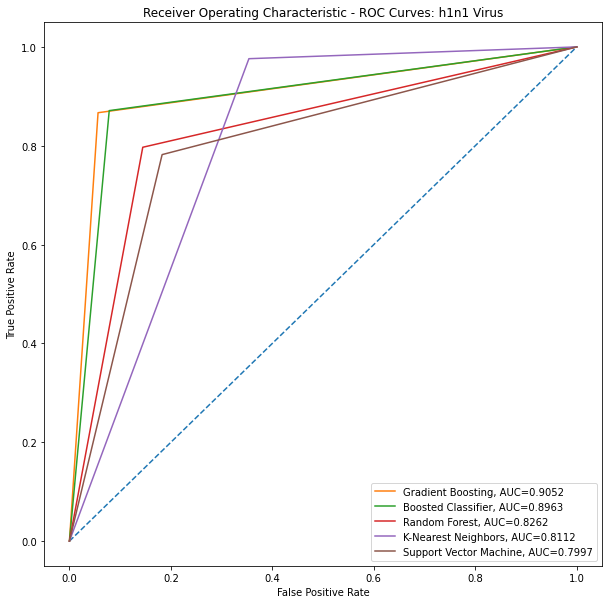

In [28]:
# H1N1 Virus

# Setting up the plotting area
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - ROC Curves: h1n1 Virus')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Fitting top five models

# Gradient Boosting ROC-AUC
gb_classif.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = gb_classif.predict(X_test_h1n1)
fpr, tpr, _ = metrics.roc_curve(y_test_h1n1, y_pred_h1n1)
auc = round(metrics.roc_auc_score(y_test_h1n1, y_pred_h1n1), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

# Boosted Classifier ROC-AUC
adaboost.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = adaboost.predict(X_test_h1n1)
fpr, tpr, _ = metrics.roc_curve(y_test_h1n1, y_pred_h1n1)
auc = round(metrics.roc_auc_score(y_test_h1n1, y_pred_h1n1), 4)
plt.plot(fpr,tpr,label="Boosted Classifier, AUC="+str(auc))

# Random Forest ROC-AUC
rf.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = rf.predict(X_test_h1n1)
fpr, tpr, _ = metrics.roc_curve(y_test_h1n1, y_pred_h1n1)
auc = round(metrics.roc_auc_score(y_test_h1n1, y_pred_h1n1), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# K-Nearest Neighbors ROC-AUC
knn.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = knn.predict(X_test_h1n1)
fpr, tpr, _ = metrics.roc_curve(y_test_h1n1, y_pred_h1n1)
auc = round(metrics.roc_auc_score(y_test_h1n1, y_pred_h1n1), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbors, AUC="+str(auc))

# Support Vector Machine ROC-AUC
SVM.fit(X_train_h1n1, y_train_h1n1)
y_pred_h1n1 = SVM.predict(X_test_h1n1)
fpr, tpr, _ = metrics.roc_curve(y_test_h1n1, y_pred_h1n1)
auc = round(metrics.roc_auc_score(y_test_h1n1, y_pred_h1n1), 4)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))


# Adding legend
plt.legend()

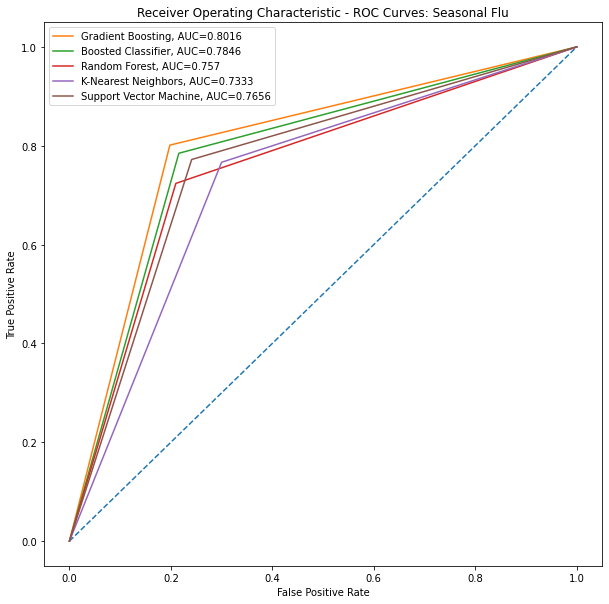

In [29]:
# Seasonal Flu

# Setting up the plotting area
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - ROC Curves: Seasonal Flu')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Fitting top five models

# Gradient Boosting ROC-AUC
gb_classif.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = gb_classif.predict(X_test_seasonal)
fpr, tpr, _ = metrics.roc_curve(y_test_seasonal, y_pred_seasonal)
auc = round(metrics.roc_auc_score(y_test_seasonal, y_pred_seasonal), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

# Boosted Classifier ROC-AUC
adaboost.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = adaboost.predict(X_test_seasonal)
fpr, tpr, _ = metrics.roc_curve(y_test_seasonal, y_pred_seasonal)
auc = round(metrics.roc_auc_score(y_test_seasonal, y_pred_seasonal), 4)
plt.plot(fpr,tpr,label="Boosted Classifier, AUC="+str(auc))

# Random Forest ROC-AUC
rf.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = rf.predict(X_test_seasonal)
fpr, tpr, _ = metrics.roc_curve(y_test_seasonal, y_pred_seasonal)
auc = round(metrics.roc_auc_score(y_test_seasonal, y_pred_seasonal), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# K-Nearest Neighbors ROC-AUC
knn.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = knn.predict(X_test_seasonal)
fpr, tpr, _ = metrics.roc_curve(y_test_seasonal, y_pred_seasonal)
auc = round(metrics.roc_auc_score(y_test_seasonal, y_pred_seasonal), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbors, AUC="+str(auc))

# Support Vector Machine ROC-AUC
SVM.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal = SVM.predict(X_test_seasonal)
fpr, tpr, _ = metrics.roc_curve(y_test_seasonal, y_pred_seasonal)
auc = round(metrics.roc_auc_score(y_test_seasonal, y_pred_seasonal), 4)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))


# Adding legend
plt.legend()

## Refining Models

### Combining optimal handling of null values, normalization/standardization, and running them on full datasets or only highly correlated features.

In [30]:
# Setting highly correlated variables
flu_correlated = ['h1n1_concern', 'h1n1_knowledge', 'behavior_wash_hands', 'behavior_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment occupation']
h1n1_correlated = ['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment occupation']

In [31]:
# Normalizing the dropped H1N1 data
X_train_drop_h1n1_corr = X_train_drop_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_test_drop_h1n1_corr = X_test_drop_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)

# Fitting a scaler on the training datasets
normh1n1_drop = MinMaxScaler().fit(X_train_drop_h1n1)
normh1n1_drop_corr = MinMaxScaler().fit(X_train_drop_h1n1_corr)

# Transforming the training datasets
X_train_drop_norm_h1n1 = normh1n1_drop.transform(X_train_drop_h1n1)
X_train_drop_norm_h1n1_corr = normh1n1_drop_corr.transform(X_train_drop_h1n1_corr)


# transform the testing dataset
X_test_drop_norm_h1n1 = normh1n1_drop.transform(X_test_drop_h1n1)
X_test_drop_norm_h1n1_corr = normh1n1_drop_corr.transform(X_test_drop_h1n1_corr)

In [32]:
# Standardizing the dropped H1N1 and Seasonal Data

# Copy the two datasets
X_train_drop_stand_h1n1 = X_train_drop_h1n1.copy()
X_train_drop_stand_seasonal = X_train_drop_seasonal.copy()
X_test_drop_stand_h1n1 = X_test_drop_h1n1.copy()
X_test_drop_stand_seasonal = X_test_drop_seasonal.copy()

# Apply standardization on the numerical features
for i in num_cols:
    
    # Fit the scaler on the training data column
    scale_drop_h1n1 = StandardScaler().fit(X_train_drop_stand_h1n1[[i]])
    scale_drop_seasonal = StandardScaler().fit(X_train_drop_stand_seasonal[[i]])
    
    # Transform the training data column
    X_train_drop_stand_h1n1[i] = scale_drop_h1n1.transform(X_train_drop_stand_h1n1[[i]])
    X_train_drop_stand_seasonal[i] = scale_drop_seasonal.transform(X_train_drop_stand_seasonal[[i]])
    
    # Transform the testing data column
    X_test_drop_stand_h1n1[i] = scale_drop_h1n1.transform(X_test_drop_stand_h1n1[[i]])
    X_test_drop_stand_seasonal[i] = scale_drop_seasonal.transform(X_test_drop_stand_seasonal[[i]])

In [33]:
# Creating correlated datasets
X_train_h1n1_corr = X_train_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_train_seasonal_corr = X_train_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)
X_test_h1n1_corr = X_test_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_test_seasonal_corr = X_test_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)

X_train_drop_stand_h1n1_corr = X_train_drop_stand_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_train_drop_stand_seasonal_corr = X_train_drop_stand_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)
X_test_drop_stand_h1n1_corr = X_test_drop_stand_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_test_drop_stand_seasonal_corr = X_test_drop_stand_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)

X_train_label_h1n1_corr = X_train_label_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_train_label_seasonal_corr = X_train_label_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)
X_test_label_h1n1_corr = X_test_label_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_test_label_seasonal_corr = X_test_label_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)

X_train_drop_h1n1_corr = X_train_drop_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_train_drop_seasonal_corr = X_train_drop_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)
X_test_drop_h1n1_corr = X_test_drop_h1n1.filter(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'employment_occupation'], axis=1)
X_test_drop_seasonal_corr = X_test_drop_seasonal.filter(['h1n1_concern', 'h1n1_knowledge', 'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1', 'household_children', 'employment_occupation'], axis=1)

In [34]:
# Logistic Regression Model
logistic = LogisticRegressionCV(cv=5, penalty = 'l2', solver = 'liblinear',tol=1e-5,max_iter=1000,Cs=10, random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Splitting data into full and correlated datasets
trainX_h1n1 = [X_train_drop_stand_h1n1, X_train_drop_stand_h1n1_corr]
testX_h1n1 = [X_test_drop_stand_h1n1, X_test_drop_stand_h1n1_corr]

trainX_seasonal = [X_train_drop_stand_seasonal, X_train_drop_stand_seasonal_corr]
testX_seasonal = [X_test_drop_stand_seasonal, X_test_drop_stand_seasonal_corr]

for i in range(len(trainX_h1n1)):   
    # Model fitting
    model = logistic.fit(trainX_h1n1[i],y_train_h1n1)    
    # Model prediction
    pred = model.predict(testX_h1n1[i])
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # Model fitting
    model = logistic.fit(trainX_seasonal[i],y_train_seasonal)    
    # Model prediction
    pred = model.predict(testX_seasonal[i])
    # Metrics
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# Results    
df_logistic = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Highly Correlated'])
df_logistic

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.499231,0.499,0.498344,0.498
Highly Correlated,0.500414,0.500,0.499739,0.499


The highly correlated models do better for H1N1, but not for the Seasonal Flu.

In [35]:
# Support Vector Machine Model
SVM = svm.LinearSVC(max_iter = 5000, penalty = 'l2', loss = 'hinge', random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Splitting data into full and correlated datasets
trainX_h1n1 = [X_train_drop_norm_h1n1, X_train_drop_norm_h1n1_corr]
testX_h1n1 = [X_test_drop_norm_h1n1, X_test_drop_norm_h1n1_corr]

trainX_seasonal = [X_train_drop_stand_seasonal, X_train_drop_stand_seasonal_corr]
testX_seasonal = [X_test_drop_stand_seasonal, X_test_drop_stand_seasonal_corr]

for i in range(len(trainX_h1n1)):   
    # Model fitting
    model = SVM.fit(trainX_h1n1[i],y_train_h1n1)    
    # Model prediction
    pred = model.predict(testX_h1n1[i])
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # Model fitting
    model = SVM.fit(trainX_seasonal[i],y_train_seasonal)    
    # Model prediction
    pred = model.predict(testX_seasonal[i])
    # Metrics
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# Results    
df_SVM = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Highly Correlated'])
df_SVM

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.495092,0.492,0.496775,0.497
Highly Correlated,0.500769,0.497,0.496950,0.486


The original and highly correlated datasets have mixed metrics.

In [36]:
# Gradient Boosting Classifier
gb_classif = GradientBoostingClassifier()

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Splitting data into full and correlated datasets
trainX_h1n1 = [X_train_label_h1n1, X_train_label_h1n1_corr]
testX_h1n1 = [X_test_label_h1n1, X_test_label_h1n1_corr]

trainX_seasonal = [X_train_seasonal, X_train_seasonal_corr]
testX_seasonal = [X_test_seasonal, X_test_seasonal_corr]

for i in range(len(trainX_h1n1)):   
    # Model fitting
    model = gb_classif.fit(trainX_h1n1[i],y_train_h1n1)    
    # Model prediction
    pred = model.predict(testX_h1n1[i])
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # Model fitting
    model = gb_classif.fit(trainX_seasonal[i],y_train_seasonal)    
    # Model prediction
    pred = model.predict(testX_seasonal[i])
    # Metrics
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# Results    
df_gb_classif = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Highly Correlated'])
df_gb_classif

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.497339,0.497,0.801638,0.802
Highly Correlated,0.500059,0.497,0.666550,0.667


Using the correlated features, the H1N1 has improved metrics while the Seasonal Flu models do better with the original data.

In [37]:
# Random Forest model
rf = RandomForestClassifier(max_depth=2, random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Splitting data into full and correlated datasets
trainX_h1n1 = [X_train_label_h1n1, X_train_label_h1n1_corr]
testX_h1n1 = [X_test_label_h1n1, X_test_label_h1n1_corr]

trainX_seasonal = [X_train_drop_seasonal, X_train_drop_seasonal_corr]
testX_seasonal = [X_test_drop_seasonal, X_test_drop_seasonal_corr]

for i in range(len(trainX_h1n1)):   
    # Model fitting
    model = rf.fit(trainX_h1n1[i],y_train_h1n1)    
    # Model prediction
    pred = model.predict(testX_h1n1[i])
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # Model fitting
    model = rf.fit(trainX_seasonal[i],y_train_seasonal)    
    # Model prediction
    pred = model.predict(testX_seasonal[i])
    # Metrics
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# Results    
df_rf = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Highly Correlated'])
df_rf

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.497339,0.497,0.502876,0.502
Highly Correlated,0.495210,0.488,0.500784,0.500


The seasonal flu model does better with the correlated dataset, which is the opposite of most of the models, and the H1N1 doesn't have a significant difference with the highly correlated dataset. 

In [38]:
# Boosted Classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), learning_rate = 1.5, n_estimators=400, random_state = 12345)

acc_h1n1 = []
f1_h1n1 = []
acc_seasonal = []
f1_seasonal = []

# Splitting data into full and correlated datasets
trainX_h1n1 = [X_train_h1n1, X_train_h1n1_corr]
testX_h1n1 = [X_test_h1n1, X_test_h1n1_corr]

trainX_seasonal = [X_train_seasonal, X_train_seasonal_corr]
testX_seasonal = [X_test_seasonal, X_test_seasonal_corr]

for i in range(len(trainX_h1n1)):   
    # Model fitting
    model = adaboost.fit(trainX_h1n1[i],y_train_h1n1)    
    # Model prediction
    pred = model.predict(testX_h1n1[i])
    acc_h1n1.append(accuracy_score(y_test_h1n1,pred))
    f1_h1n1.append(round(f1_score(y_test_h1n1, pred, average='macro'), 3))
    
for i in range(len(trainX_seasonal)):   
    # Model fitting
    model = adaboost.fit(trainX_seasonal[i],y_train_seasonal)    
    # Model prediction
    pred = model.predict(testX_seasonal[i])
    # Metrics
    acc_seasonal.append(accuracy_score(y_test_seasonal,pred))
    f1_seasonal.append(round(f1_score(y_test_seasonal, pred, average='macro'), 3))
    

# Results    
df_adaboost = pd.DataFrame({'Acc H1N1':acc_h1n1, 'F1 H1N1':f1_h1n1, 'Acc Flu':acc_seasonal, 'F1 Flu':f1_seasonal},index=['Original','Highly Correlated'])
df_adaboost

,Acc H1N1,F1 H1N1,Acc Flu,F1 Flu
Original,0.896274,0.896,0.784556,0.785
Highly Correlated,0.854997,0.855,0.670560,0.670


The metrics are better with the original data.

Overall, combining null values and normalization/standardization types lowers the metrics for the models. The top two H1N1 models are the Encoded Gradient Boosted Classifier model (Accuracy: 0.9069) and the Gradient Boosted Classifier model without adjustments (Accuracy: 0.904). The top two Seasonal Flu models are the Dropped NA Gradient Boosted Classifier Model (Accuracy: 0.8055) and the Gradient Boosted Classifier model without adjustments (Accuracy: 0.7951). 

### After running through models with various datasets, the top models are tuned to find the optimal model overall. 

## Tuning Gradient Boost Model

In [44]:
# Gradient Boosting Classifier
gb_classif = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
# define search space
space_h1n1 = dict()
# space['activation'] = ['identity', 'logistic', 'tanh', 'relu']
# space['solver'] = ['lbfgs', 'sgd', 'adam']
space_h1n1['learning_rate'] = [0.05,0.10, 0.15]
# space['criterion'] = ['log_loss', 'deviance', 'exponential']
space_h1n1['loss'] =  ['log_loss'] # ['log_loss', 'deviance', 'exponential']
space_h1n1['max_depth'] = np.arange(9, 11, 1) # [4,10,12,20] #
space_h1n1['max_features'] = ['sqrt'] # ['auto', 'sqrt', 'log2']
space_h1n1['subsample'] = np.arange(0.7, 0.9, 0.1)
space_h1n1['min_samples_split'] =  np.arange(880, 920, 100) # np.arange(2, 1002, 200) # [200,600,1000]
space_h1n1['min_samples_leaf'] = np.arange(96, 104, 1) # [10,40,70,100] 
# space['C'] = [0.1,1,3,10,50]
# space['C'] = loguniform(1e-5, 100)
# space['alpha'] = np.logspace(-1, 1, 5)
# define search
# search = RandomizedSearchCV(gb_classif, space, n_iter= 4000, scoring=make_scorer(f1_score(average='micro')), n_jobs=-1, cv=cv, random_state=1)
search = GridSearchCV(gb_classif, space_h1n1, scoring='f1', n_jobs=-1, cv=cv)

# Encoded Labels H1N1
# Best Score: 0.9045907858202186
# Best Hyperparameters: {'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 1000, 'subsample': 1}
p('Encoded Labels H1N1')
result = search.fit(X_label_h1n1, y_label_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
result = search.fit(X_median_h1n1, y_median_h1n1)
p('Median H1N1')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Drop H1N1')
result = search.fit(X_drop_h1n1, y_drop_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Iterative H1N1')
result = search.fit(X_train_h1n1, y_train_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

# Encoded Labels Seasonal
# Best Score: 0.7958435319310646
# Best Hyperparameters: {'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 1000, 'subsample': 1}
space_seasonal = space_h1n1
space_seasonal['max_depth'] = [4] # np.arange(3,5, 1)
space_seasonal['min_samples_leaf'] =  np.arange(7, 9, 1)

space_h1n1['learning_rate'] = [0.25,0.20, 0.15]
space_h1n1['min_samples_split'] =  np.arange(940, 1060, 20)
search = GridSearchCV(gb_classif, space_seasonal, scoring='f1', n_jobs=-1, cv=cv)
# Best Result
p('Encoded Labels Seasonal')
result = search.fit(X_label_seasonal, y_label_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Median Seasonal')
result = search.fit(X_median_seasonal, y_median_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Drop Seasonal')
result = search.fit(X_drop_seasonal, y_drop_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Iterative Seasonal')
result = search.fit(X_train_seasonal, y_train_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Encoded Labels H1N1
Best Score: 0.904337412136152
Best Hyperparameters: {'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 99, 'min_samples_split': 880, 'subsample': 0.8999999999999999}
Median H1N1
Best Score: 0.904401022646257
Best Hyperparameters: {'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 99, 'min_samples_split': 880, 'subsample': 0.8999999999999999}
Drop H1N1
Best Score: 0.9050039854143886
Best Hyperparameters: {'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 880, 'subsample': 0.8999999999999999}
Iterative H1N1
Best Score: 0.9044691159518491
Best Hyperparameters: {'learning_rate': 0.15, 'loss': 'log_loss', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 98, 'min_samples_split': 880, 'subsample': 0.8999999999999999}
Encoded Labels Seasonal
 Best Score: 0.7956260070877379
Best H

## Tuning Adaboost Model

In [46]:
# Boosted Classifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), learning_rate = 1.5, n_estimators=400, random_state = 12345)

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define search space
space = dict()
# space['activation'] = ['identity', 'logistic', 'tanh', 'relu']
# space['solver'] = ['lbfgs', 'sgd', 'adam']
# space['learning_rate'] = [1e-2, 1e-1, 1, 10, 100]
space['learning_rate'] = [0.05, 0.20, 0.05]
# space['criterion'] = ['log_loss', 'deviance', 'exponential']
space['algorithm'] = ['SAMME.R'] # ['SAMME', 'SAMME.R']
# space['loss'] = ['log_loss', 'deviance', 'exponential']
# space['max_depth'] = np.arange(2, 20, 1)
# space['max_features'] = ['auto', 'sqrt', 'log2']
space['n_estimators'] = np.arange(460, 540, 20) 
# space['subsample'] = np.arange(0.1, 1, 0.1)
# space['min_samples_split'] = np.arange(50, 1000, 50) 
# space['min_samples_leaf'] = np.arange(5, 100, 5)
# space['C'] = [0.1,1,3,10,50]
# space['C'] = loguniform(1e-5, 100)
# space['alpha'] = np.logspace(-1, 1, 5)
# define search
# space['bootstrap'] = [False]
# Best Score: 0.9034636637037803
# Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 500}
# search = RandomizedSearchCV(gb_classif, space, n_iter= 4000, scoring=make_scorer(f1_score(average='micro')), n_jobs=-1, cv=cv, random_state=1)
search = GridSearchCV(adaboost, space, scoring='f1', n_jobs=-1, cv=cv)

# Execute Searches

p('Encoded Labels H1N1')
result = search.fit(X_label_h1n1, y_label_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
# Encoded Labels H1N1
# Best Score: 0.9038764476804024
# Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 500}
result = search.fit(X_median_h1n1, y_median_h1n1)
p('Median H1N1')
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Drop H1N1')
result = search.fit(X_drop_h1n1, y_drop_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Iterative H1N1')
result = search.fit(X_train_h1n1, y_train_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

result = search.fit(X_median_seasonal, y_median_seasonal)
p('Median Seasonal')
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
result = search.fit(X_label_seasonal, y_label_seasonal)
p('Encoded Labels Seasonal')
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Drop Seasonal')
result = search.fit(X_drop_seasonal, y_drop_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Iterative Seasonal')
result = search.fit(X_train_seasonal, y_train_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Encoded Labels H1N1
Best Score: 0.9038445565381382
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 460}
Median H1N1
Best Score: 0.9033917888706965
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 520}
Drop H1N1
Best Score: 0.9034572822916048
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 500}
Iterative H1N1
Best Score: 0.9031452092442146
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 520}
Median Seasonal
 Best Score: 0.794845712302552
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.2, 'n_estimators': 500}
Encoded Labels Seasonal
 Best Score: 0.7934054238316012
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 480}
Drop Seasonal
 Best Score: 0.7940628686385726
Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 520}
Iterative Seasonal
 Best Score: 0.796

## Tuning Random Forest Model

In [48]:
# Random Forest model
rf = RandomForestClassifier(max_depth=2, random_state = 12345)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
# define search space
space_h1n1 = dict()
# space['activation'] = ['identity', 'logistic', 'tanh', 'relu']
# space['solver'] = ['lbfgs', 'sgd', 'adam']
# space['learning_rate'] =np.arange(0.05, 0.4, 0.05)
space_h1n1['criterion'] = ['log_loss'] # ['log_loss', 'deviance', 'exponential']
# space['loss'] = ['log_loss', 'deviance', 'exponential']
space_h1n1['max_depth'] = [18,19] # np.arange(17, 19, 1)
space_h1n1['max_features'] = ['log2'] #['auto', 'sqrt', 'log2']
# space['n_estimators'] = np.arange(50, 800, 50)
space_h1n1['n_estimators'] = [480,490,500,510,520,530,690,700,710]
space_h1n1['bootstrap'] = [False]
space_seasonal = space_h1n1
space_seasonal['n_estimators'] = np.arange(70, 130, 10) 
# space['subsample'] = np.arange(0.1, 1, 0.1)
# space['min_samples_split'] = np.arange(50, 800, 50) 
# space['min_samples_leaf'] = np.arange(5, 100, 5)
# space['C'] = [0.1,1,3,10,50]
# space['C'] = loguniform(1e-5, 100)
# space['alpha'] = np.logspace(-1, 1, 5)
# define search

search = GridSearchCV(rf, space_h1n1, scoring='f1', n_jobs=-1, cv=cv)

p('RF')
# Encoded Labels H1N1
# Best Score: 0.9034758571227902
# Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 18, 'max_features': 'log2', 'n_estimators': 700}
p('Encoded Labels H1N1')
result = search.fit(X_label_h1n1, y_label_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
# Best Score: 0.9034847077221357
# Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 18, 'max_features': 'log2', 'n_estimators': 500}
p('Median H1N1')
result = search.fit(X_median_h1n1, y_median_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Drop H1N1')
result = search.fit(X_drop_h1n1, y_drop_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Iterative H1N1')
result = search.fit(X_train_h1n1, y_train_h1n1)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


search = GridSearchCV(rf, space_seasonal, scoring='f1', n_jobs=-1, cv=cv)
# Best Result
# Encoded Labels Seasonal
#  Best Score: 0.7920900191120853
# Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 18, 'max_features': 'log2', 'n_estimators': 100}
p('Encoded Labels Seasonal')
result = search.fit(X_label_seasonal, y_label_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Median Seasonal')
result = search.fit(X_median_seasonal, y_median_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Drop Seasonal')
result = search.fit(X_drop_seasonal, y_drop_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
p('Iterative Seasonal')
result = search.fit(X_train_seasonal, y_train_seasonal)
print(' Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


RF
Encoded Labels H1N1
Best Score: 0.906739717389582
Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 19, 'max_features': 'log2', 'n_estimators': 110}
Median H1N1
Best Score: 0.9074209476325167
Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 18, 'max_features': 'log2', 'n_estimators': 120}
Drop H1N1
Best Score: 0.9070391675037159
Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 19, 'max_features': 'log2', 'n_estimators': 120}
Iterative H1N1
Best Score: 0.9058118875744122
Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 18, 'max_features': 'log2', 'n_estimators': 120}
Encoded Labels Seasonal
 Best Score: 0.7914769798058852
Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_loss', 'max_depth': 19, 'max_features': 'log2', 'n_estimators': 120}
Median Seasonal
 Best Score: 0.790702944703836
Best Hyperparameters: {'bootstrap': False, 'criterion': 'log_los

### Training and Validating Top H1N1 Models


GradientBoosting - Drop Data H1N1 F1 score:  0.903
Confusion Matrix (Accuracy 0.9032)

       Prediction
Actual    0    1
     0 1891  115
     1  288 1871


<AxesSubplot:>

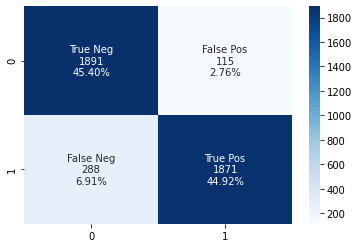

In [54]:
# Gradient Boosting Classifier Model w/ dropped nulls
gb_classif_final = GradientBoostingClassifier(learning_rate=0.15, loss='log_loss', max_depth=10, max_features='sqrt',
                                       min_samples_leaf=100, min_samples_split=880, subsample=0.8999999999999999)
gb_classif_final.fit(X_train_drop_h1n1, y_train_drop_h1n1)
y_pred_drop_h1n1_gb = gb_classif_final.predict(X_val_drop_h1n1)
f1 = round(f1_score(y_val_drop_h1n1, y_pred_drop_h1n1_gb, average='macro'), 3)
print("\nGradientBoosting - Drop Data H1N1 F1 score: ", f1)
classificationSummary(y_val_drop_h1n1, y_pred_drop_h1n1_gb)

# Create plot of the confusion matrix, showing performance of the model
cm = confusion_matrix(y_val_drop_h1n1, y_pred_drop_h1n1_gb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


Adaboost - Encoded Data H1N1 F1 score:  0.905
Confusion Matrix (Accuracy 0.9052)

       Prediction
Actual    0    1
     0 1982  119
     1  276 1788


<AxesSubplot:>

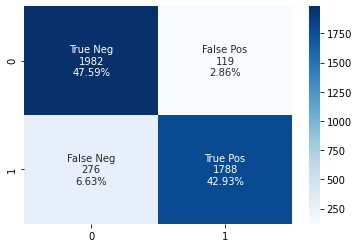

In [55]:
# Adaboost Model w/ encoded nulls
adaboost_final = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), algorithm='SAMME.R', learning_rate = 0.2, n_estimators=460, 
                                    random_state = 12345)
adaboost_final.fit(X_train_label_h1n1, y_train_label_h1n1)
y_pred_label_h1n1_ada = adaboost_final.predict(X_val_label_h1n1)
f1 = round(f1_score(y_val_label_h1n1, y_pred_label_h1n1_ada, average='macro'), 3)
print("\nAdaboost - Encoded Data H1N1 F1 score: ", f1)
classificationSummary(y_val_label_h1n1, y_pred_label_h1n1_ada)

# Create plot of the confusion matrix, showing performance of the model
cm = confusion_matrix(y_val_label_h1n1, y_pred_label_h1n1_ada)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


Adaboost - Encoded Data H1N1 F1 score:  0.915
Confusion Matrix (Accuracy 0.9155)

       Prediction
Actual    0    1
     0 2019   85
     1  267 1794


<AxesSubplot:>

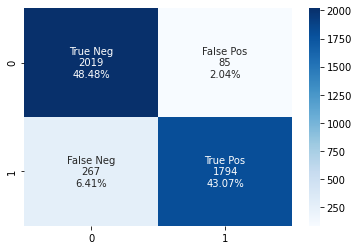

In [56]:
# Random Forest Model w/ median nulls
rf_final_h1n1 = RandomForestClassifier(max_depth=18, bootstrap=False, criterion='log_loss', max_features='log2', n_estimators=120,
                                       random_state = 12345)
rf_final_h1n1.fit(X_train_median_h1n1, y_train_median_h1n1)
y_pred_median_h1n1_rf = rf_final_h1n1.predict(X_val_median_h1n1)
f1 = round(f1_score(y_val_median_h1n1, y_pred_median_h1n1_rf, average='macro'), 3)
print("\nAdaboost - Encoded Data H1N1 F1 score: ", f1)
classificationSummary(y_val_median_h1n1, y_pred_median_h1n1_rf)

# Create plot of the confusion matrix, showing performance of the model
cm = confusion_matrix(y_val_median_h1n1, y_pred_median_h1n1_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### Training and Validating Top Seasonal Flu Models


GradientBoosting - Drop Data H1N1 F1 score:  0.783
Confusion Matrix (Accuracy 0.7835)

       Prediction
Actual    0    1
     0 1122  291
     1  321 1093


<AxesSubplot:>

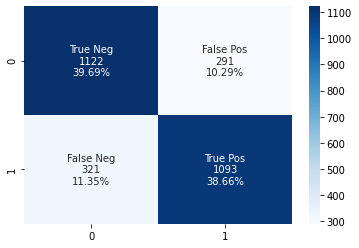

In [57]:
# Gradient Boosting Classifier Model w/ dropped nulls
gb_classif_final_sf = GradientBoostingClassifier(learning_rate=0.25, loss='log_loss', max_depth=4, max_features='sqrt',
                                       min_samples_leaf=8, min_samples_split=1040, subsample=0.8999999999999999)
gb_classif_final_sf.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal_gb = gb_classif_final_sf.predict(X_val_seasonal)
f1 = round(f1_score(y_val_seasonal, y_pred_seasonal_gb, average='macro'), 3)
print("\nGradientBoosting - Drop Data H1N1 F1 score: ", f1)
classificationSummary(y_val_seasonal, y_pred_seasonal_gb)

# Create plot of the confusion matrix, showing performance of the model
cm = confusion_matrix(y_val_seasonal, y_pred_seasonal_gb)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


GradientBoosting - Drop Data H1N1 F1 score:  0.799
Confusion Matrix (Accuracy 0.7987)

       Prediction
Actual    0    1
     0 1149  264
     1  305 1109


<AxesSubplot:>

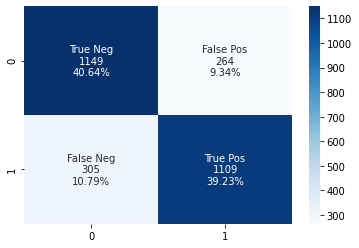

In [58]:
# Adaboost Model w/ dropped nulls
adaboost_final_sf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2), algorithm='SAMME.R', learning_rate = 0.2, n_estimators=500, 
                                    random_state = 12345)
adaboost_final_sf.fit(X_train_seasonal, y_train_seasonal)
y_pred_seasonal_ada = adaboost_final_sf.predict(X_val_seasonal)
f1 = round(f1_score(y_val_seasonal, y_pred_seasonal_ada, average='macro'), 3)
print("\nGradientBoosting - Drop Data H1N1 F1 score: ", f1)
classificationSummary(y_val_seasonal, y_pred_seasonal_ada)

# Create plot of the confusion matrix, showing performance of the model
cm = confusion_matrix(y_val_seasonal, y_pred_seasonal_ada)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


GradientBoosting - Drop Data H1N1 F1 score:  0.801
Confusion Matrix (Accuracy 0.8012)

       Prediction
Actual    0    1
     0 1126  245
     1  317 1139


<AxesSubplot:>

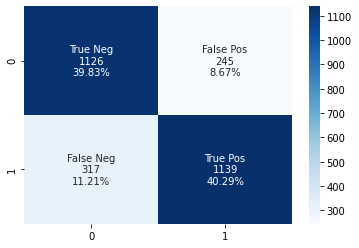

In [59]:
# Random Forest Model w/ dropped nulls
rf_final_seasonal = RandomForestClassifier(max_depth=19, bootstrap=False, criterion='log_loss', max_features='log2', n_estimators=90,
                                       random_state = 12345)
rf_final_seasonal.fit(X_train_drop_seasonal, y_train_drop_seasonal)
y_pred_seasonal_rf = rf_final_seasonal.predict(X_val_drop_seasonal)
f1 = round(f1_score(y_val_drop_seasonal, y_pred_seasonal_rf, average='macro'), 3)
print("\nGradientBoosting - Drop Data H1N1 F1 score: ", f1)
classificationSummary(y_val_drop_seasonal, y_pred_seasonal_rf)

# Create plot of the confusion matrix, showing performance of the model
cm = confusion_matrix(y_val_drop_seasonal, y_pred_seasonal_rf)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### ROC AUC for Top Models

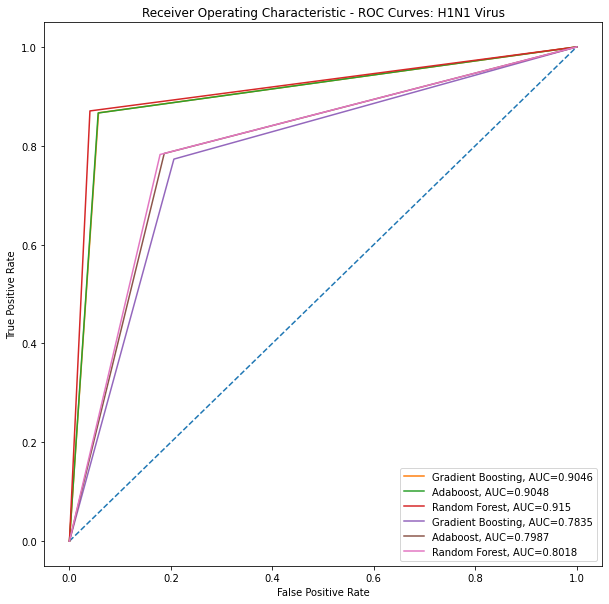

In [61]:
# Setting up the plotting area
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - ROC Curves: H1N1 Virus')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fpr, tpr, _ = metrics.roc_curve(y_val_drop_h1n1, y_pred_drop_h1n1_gb)
auc = round(metrics.roc_auc_score(y_val_drop_h1n1, y_pred_drop_h1n1_gb), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val_label_h1n1, y_pred_label_h1n1_ada)
auc = round(metrics.roc_auc_score(y_val_label_h1n1, y_pred_label_h1n1_ada), 4)
plt.plot(fpr,tpr,label="Adaboost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val_median_h1n1, y_pred_median_h1n1_rf)
auc = round(metrics.roc_auc_score(y_val_median_h1n1, y_pred_median_h1n1_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val_seasonal, y_pred_seasonal_gb)
auc = round(metrics.roc_auc_score(y_val_seasonal, y_pred_seasonal_gb), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val_seasonal, y_pred_seasonal_ada)
auc = round(metrics.roc_auc_score(y_val_seasonal, y_pred_seasonal_ada), 4)
plt.plot(fpr,tpr,label="Adaboost, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val_drop_seasonal, y_pred_seasonal_rf)
auc = round(metrics.roc_auc_score(y_val_drop_seasonal, y_pred_seasonal_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# Adding legend
plt.legend()

Validation metrics show that the Random Forest models performed best on the validation data for both the H1N1 and Seasonal Flu models, showing that the Gradient Boosting models may have higher bias toward the training data and that the Random Forest models may take into account higher variance. 